## Descripción del proyecto
La cadena de gimnasios Model Fitness está desarrollando una estrategia de interacción con clientes basada en datos analíticos.

Uno de los problemas más comunes que enfrentan los gimnasios y otros servicios es la pérdida de clientes. ¿Cómo descubres si un/a cliente ya no está contigo? Puedes calcular la pérdida en función de las personas que se deshacen de sus cuentas o no renuevan sus contratos. Sin embargo, a veces no es obvio que un/a cliente se haya ido: puede que se vaya de puntillas.

Los indicadores de pérdida varían de un campo a otro. Si un usuario o una usuaria compra en una tienda en línea con poca frecuencia, pero con regularidad, no se puede decir que ha huido. Pero si durante dos semanas no ha abierto un canal que se actualiza a diario, es motivo de preocupación: es posible que tu seguidor o seguidor/a se haya aburrido y te haya abandonado.

En el caso de un gimnasio, tiene sentido decir que un/a cliente se ha ido si no viene durante un mes. Por supuesto, es posible que estén en Cancún y retomen sus visitas cuando regresen, pero ese no es un caso típico. Por lo general, si un/a cliente se une, viene varias veces y luego desaparece, es poco probable que regrese.

Con el fin de combatir la cancelación, Model Fitness ha digitalizado varios de sus perfiles de clientes. Tu tarea consiste en analizarlos y elaborar una estrategia de retención de clientes.

## Inicialización

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans


## Paso 1: Cargar datos

In [4]:
# Carga los archivos de datos en diferentes DataFrames
data = pd.read_csv('C:\\Users\\Armando Ochoa\\Documents/datasets/gym_churn_us.csv')

## Paso 2: Preparar los datos

In [5]:
#Información general.
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [6]:
#Revisión de duplicados.
data.duplicated().sum()

0

In [7]:
#Tabla revisión de valores ausentes.
data.isna().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

In [8]:
#Revisión de columna.
data.columns

Index(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn'],
      dtype='object')

In [9]:
data.sample(5)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
1082,0,0,0,0,1,1,0,32,59.420799,1.0,1,0.085387,0.484418,1
30,0,1,1,0,1,1,1,32,44.672508,1.0,1,1.771692,1.687872,0
864,1,0,1,0,1,1,0,28,191.718144,1.0,9,2.350244,2.218518,0
2187,1,1,1,0,1,1,0,31,217.577657,1.0,3,1.141421,1.082992,0
19,1,1,1,1,1,12,1,29,73.917546,11.0,14,1.141327,1.158455,0


## Obeservaciones

- En el dataframe no se detectan datos ausentes y duplicados
- Descripcion de la tabla:
  - Datos del usuario del mes anterior
     - 'gender'.
     - 'Near_Location' — si el/la usuario/a vive o trabaja en el vecindario donde se encuentra el gimnasio.
     - 'Partner' — si el/la usuario/a trabaja en una compañía asociada (el gimnasio tiene empresas asociadas cuyos empleados obtienen descuentos; en    esos casos el gimnasio almacena información sobre los empleadores de los clientes).
     - Promo_friends — si el/la usuario/a originalmente se inscribió mediante una oferta “trae a un/a amigo/a” (se utilizó el código promocional de un/a amigo/a cuando pagaron el primer abono).
     - 'Phone' — si el/la usuario/a aportó el número de teléfono.
     - 'Age'.
     - 'Lifetime' — el tiempo (en meses) desde que el/la usuario/a llegó por primera vez al gimnasio.
  - Datos del registro de visitas y compras y datos sobre el estado actual de la membresía:
      - 'Contract_period' — 1 mes, 3 meses, 6 meses o 1 año.
      - 'Month_to_end_contract' — los meses que faltan hasta que expire el contrato.
      - 'Group_visits' — si el/la usuario/a participa en sesiones grupales.
      - 'Avg_class_frequency_total' — frecuencia media de visitas por semana a lo largo de la vida del cliente.
      - 'Avg_class_frequency_current_month' — frecuencia media de visitas por semana durante el mes en curso.
      - 'Avg_additional_charges_total' — cantidad total de dinero gastado en otros servicios del gimnasio: cafetería, productos deportivos, cosméticos, masajes, etc. 

## Paso 2: Analisis Exploratorio de Datos (EDA)

In [10]:
# Verificar valores nulos
data.isnull().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

In [11]:
#Estadísticas descriptivas
data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [12]:
# Agrupar por 'Churn' y calcular promedios
data.groupby('Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


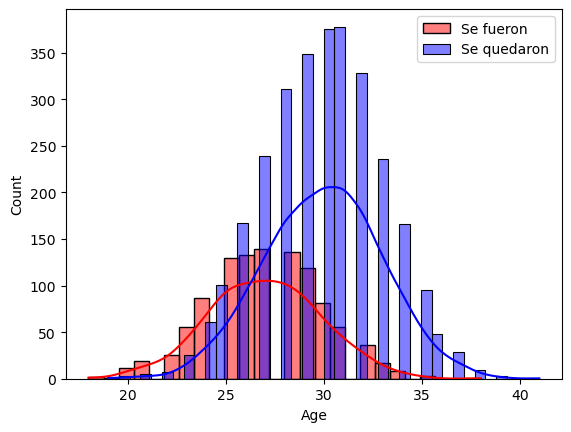

In [13]:
# Histograma para una característica
sns.histplot(data[data['Churn'] == 1]['Age'], color='red', label='Se fueron', kde=True)
sns.histplot(data[data['Churn'] == 0]['Age'], color='blue', label='Se quedaron', kde=True)
plt.legend()
plt.show()

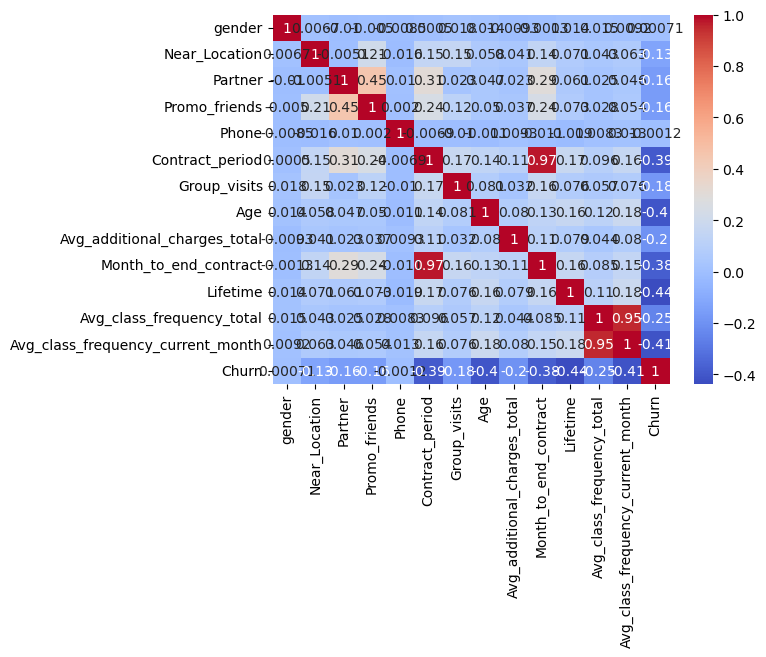

In [14]:
# Matriz de correlación
correlation_matrix = data.corr()

# Graficar la matriz
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

## Paso 3: Construir un modelo para predecir la cancelación

In [15]:
# Separar características y objetivo
X = data.drop('Churn', axis=1)
y = data['Churn']

# Dividir en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Entrenar el modelo
model_logistic = LogisticRegression(random_state=42)
model_logistic.fit(X_train, y_train)

# Evaluar el modelo
y_pred_logistic = model_logistic.predict(X_val)
print('Exactitud:', accuracy_score(y_val, y_pred_logistic))
print('Precisión:', precision_score(y_val, y_pred_logistic))
print('Recall:', recall_score(y_val, y_pred_logistic))

Exactitud: 0.91375
Precisión: 0.8715083798882681
Recall: 0.7722772277227723


c:\Users\Armando Ochoa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
# Entrenar el modelo
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# Evaluar el modelo
y_pred_rf = model_rf.predict(X_val)
print('Exactitud:', accuracy_score(y_val, y_pred_rf))
print('Precisión:', precision_score(y_val, y_pred_rf))
print('Recall:', recall_score(y_val, y_pred_rf))

Exactitud: 0.91
Precisión: 0.8494623655913979
Recall: 0.7821782178217822


## Paso 4: Crear clústeres de usuarios

In [18]:
#Estandatizar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

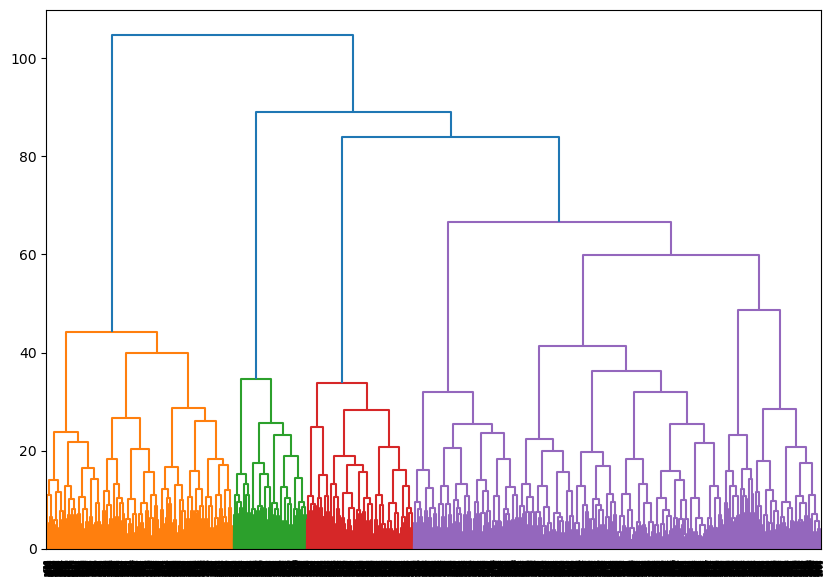

In [19]:
# Crear matriz de distancias
linked = linkage(X_scaled, method='ward')

# Graficar dendrograma
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.show()

In [20]:
# Entrenar K-means
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Agregar clústeres al DataFrame
data['Cluster'] = clusters

In [21]:
print(data.groupby('Cluster').mean())

           gender  Near_Location   Partner  Promo_friends     Phone  \
Cluster                                                               
0        0.484801       0.698363  0.301637       0.007015  0.899454   
1        0.494471       0.947867  0.791469       0.998420  0.906793   
2        0.464396       0.913313  0.766254       0.493808  0.925697   
3        0.547794       0.937500  0.742647       0.424632  0.863971   
4        0.568233       0.878076  0.178971       0.048098  0.914989   

         Contract_period  Group_visits        Age  \
Cluster                                             
0               1.733437      0.255651  28.074825   
1               2.740916      0.431280  28.903633   
2              10.495356      0.506192  30.091331   
3              11.194853      0.575368  29.720588   
4               2.120805      0.456376  29.993289   

         Avg_additional_charges_total  Month_to_end_contract  Lifetime  \
Cluster                                                 

In [22]:
print(data.groupby('Cluster')['Churn'].mean())

Cluster
0    0.587685
1    0.285940
2    0.013932
3    0.042279
4    0.105145
Name: Churn, dtype: float64
